# Display the images resulting from tests

In [1]:
%matplotlib inline

import os
import sys

sys.path.append(os.path.join('..', '..'))

from matplotlib import pylab
import numpy
from matplotlib import pyplot as plt

from data_models.parameters import arl_path
from wrappers.serial.image.operations import show_image, qa_image, import_image_from_fits

import logging

log = logging.getLogger()
log.setLevel(logging.INFO)
log.addHandler(logging.StreamHandler(sys.stdout))

In [13]:
pylab.rcParams['figure.figsize'] = (12.0, 12.0)
pylab.rcParams['image.cmap'] = 'rainbow'


fits_files = []
results_dir = './results/mpi'
for file in os.listdir(results_dir):
    if file.endswith(".fits"):
        fits_files.append(file)
        
fits_files = numpy.sort(fits_files)

empty = list()
for file in fits_files:
    im = import_image_from_fits('%s/%s' % (results_dir,file))
    if numpy.max(numpy.abs(im.data)) == 0.0:
        empty.append(file)

import pprint
p=pprint.PrettyPrinter()
print("The following files are empty:")  
p.pprint(empty)   

The following files are empty:
[]


******************************************************************
Quality assessment:
	Origin: qa_image
	Context: imaging-dask_continuum_imaging_residual.fits
	Data:
		shape: '(1, 1, 512, 512)'
		max: '0.1565291487569743'
		min: '-0.10403423049039412'
		rms: '0.005893042270230757'
		sum: '9.63703121854995'
		medianabs: '0.0023363085990524405'
		median: '-0.0005408592984346367'



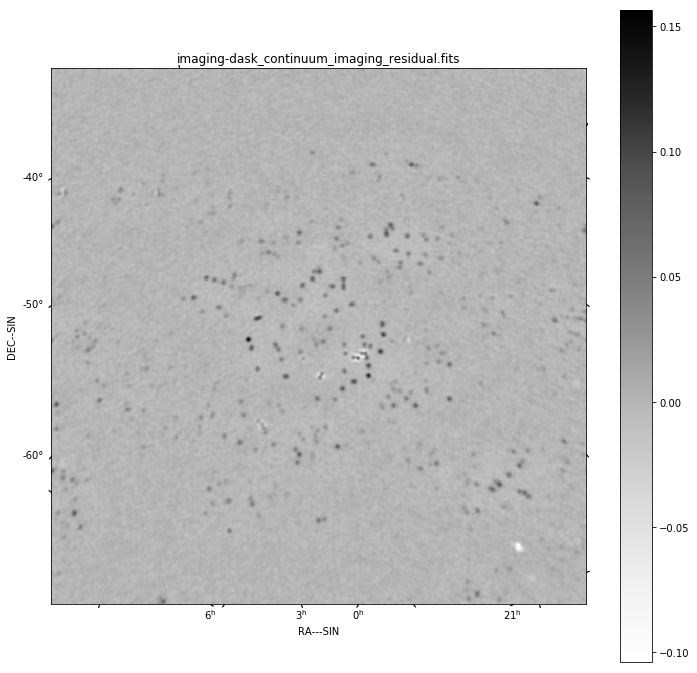

******************************************************************
Quality assessment:
	Origin: qa_image
	Context: imaging-dask_continuum_imaging_restored.fits
	Data:
		shape: '(1, 1, 512, 512)'
		max: '6.715464121681861'
		min: '-0.01651154854400732'
		rms: '0.07863361780041714'
		sum: '1240.4771719434618'
		medianabs: '0.0023649598667776807'
		median: '-0.0004062586065126015'



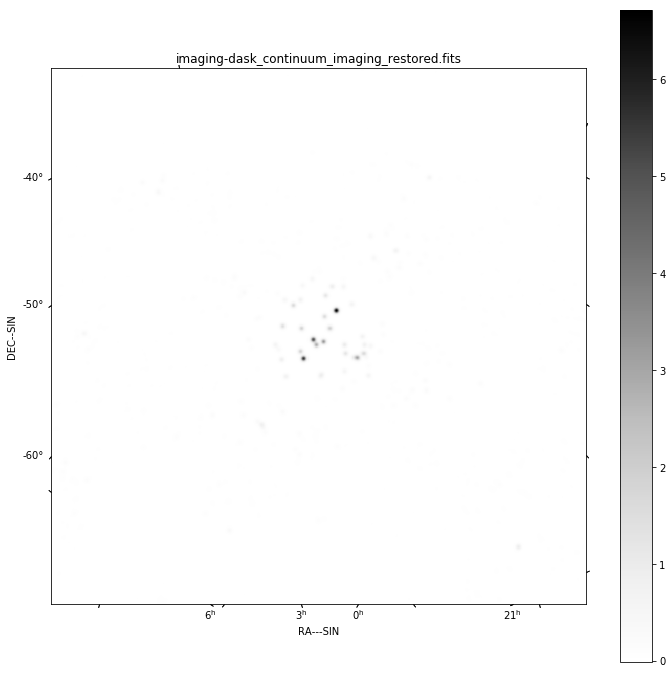

******************************************************************
Quality assessment:
	Origin: qa_image
	Context: imaging-dask_ical_residual.fits
	Data:
		shape: '(1, 1, 512, 512)'
		max: '0.21335184578527247'
		min: '-0.07842533398825766'
		rms: '0.008353609263932816'
		sum: '7.250907755157182'
		medianabs: '0.0046981600116622665'
		median: '-0.0002362781724104496'



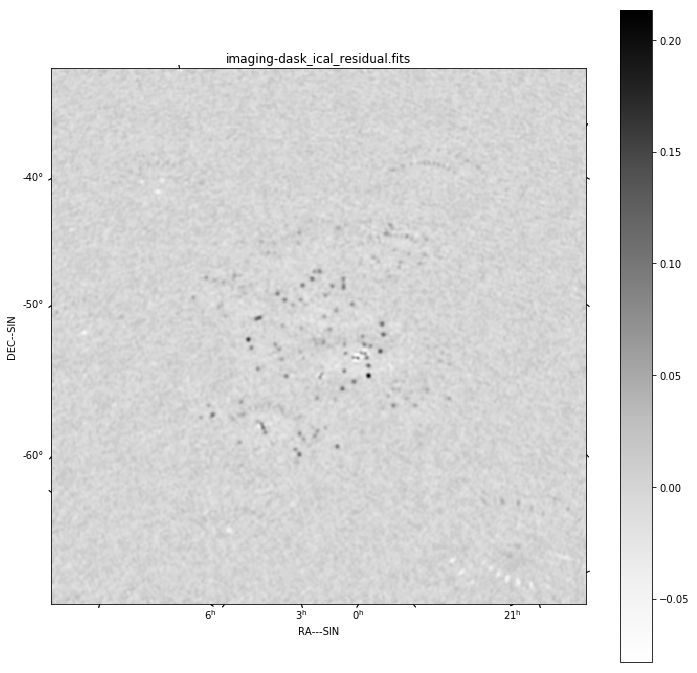

******************************************************************
Quality assessment:
	Origin: qa_image
	Context: imaging-dask_ical_restored.fits
	Data:
		shape: '(1, 1, 512, 512)'
		max: '6.714238149982598'
		min: '-0.05966806243468124'
		rms: '0.07827503205417431'
		sum: '1071.9577060870033'
		medianabs: '0.00473786055518016'
		median: '-0.00011168524145718534'



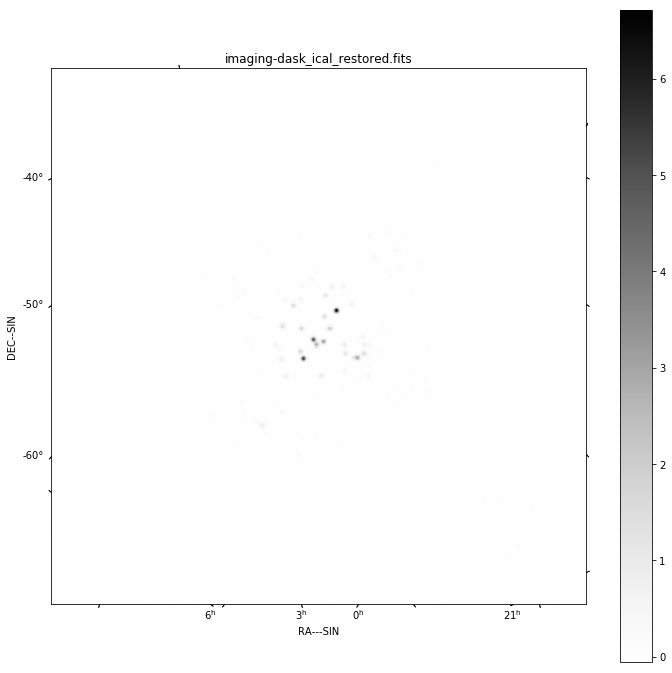

******************************************************************
Quality assessment:
	Origin: qa_image
	Context: imaging-dirty.fits
	Data:
		shape: '(1, 1, 512, 512)'
		max: '6.628923853328559'
		min: '-0.30019860621207395'
		rms: '0.08729461588689516'
		sum: '0.8151558067189306'
		medianabs: '0.02896549154367777'
		median: '-0.002024792677956068'



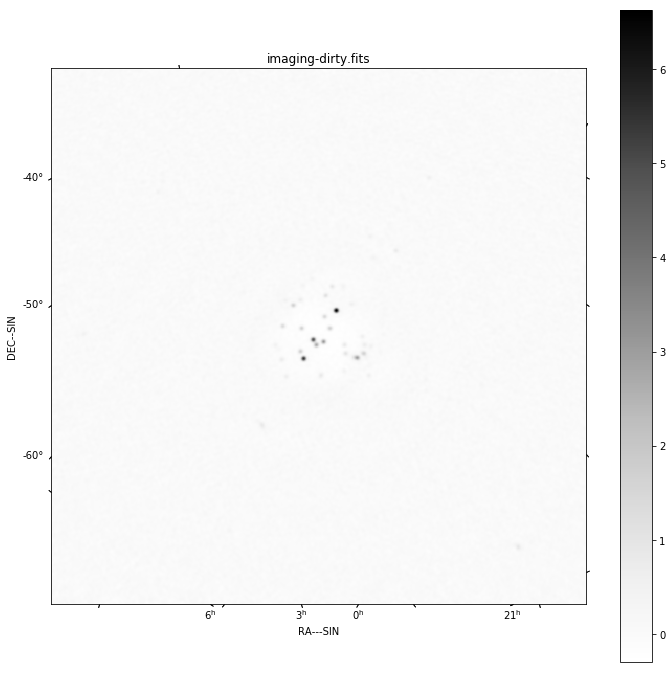

******************************************************************
Quality assessment:
	Origin: qa_image
	Context: imaging-psf.fits
	Data:
		shape: '(1, 1, 512, 512)'
		max: '0.9986766569773986'
		min: '-0.018136133020911282'
		rms: '0.006983288218923272'
		sum: '-2.9807157345748654'
		medianabs: '0.002221951011668526'
		median: '-0.00020166821254899306'



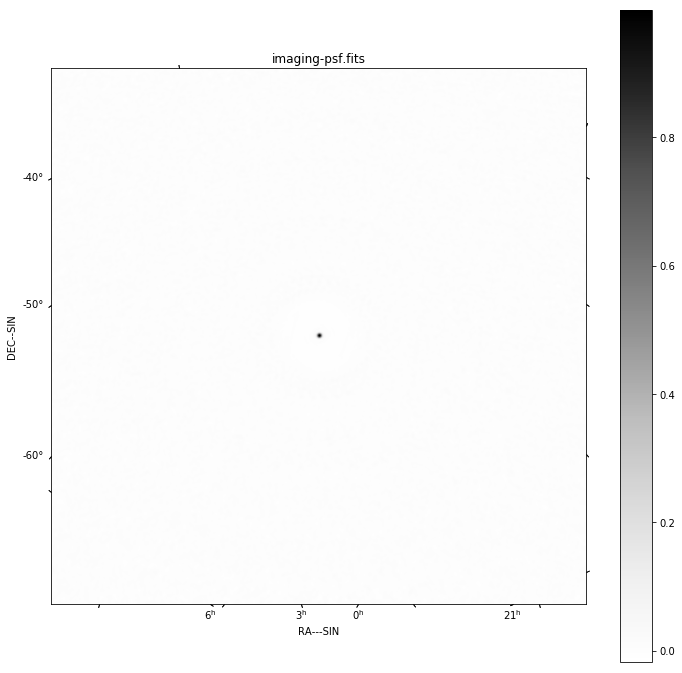

In [14]:
for file in fits_files:
    print('******************************************************************')

    im = import_image_from_fits('%s/%s' % (results_dir,file))
    print(qa_image(im, context=file))
    try:
        show_image(im, title=file)
        plt.show()
    except IndexError:
        pass

